# Credit Default Risk Model

## Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
#this sets a global change to make all scientific notations into
#longform numbers. TO reset the change use pd.reset_option('display.float_format')

In [3]:
df = pd.read_csv('credit_risk_dataset.csv')

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.000,PERSONAL,D,35000,16.020,1,0.590,Y,3
1,21,9600,OWN,5.000,EDUCATION,B,1000,11.140,0,0.100,N,2
2,25,9600,MORTGAGE,1.000,MEDICAL,C,5500,12.870,1,0.570,N,3
3,23,65500,RENT,4.000,MEDICAL,C,35000,15.230,1,0.530,N,2
4,24,54400,RENT,8.000,MEDICAL,C,35000,14.270,1,0.550,Y,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000,32581.000,31686.000,32581.000,29465.000,32581.000,32581.000,32581.000
mean,27.735,66074.848,4.790,9589.371,11.012,0.218,0.170,5.804
std,6.348,61983.119,4.143,6322.087,3.240,0.413,0.107,4.055
min,20.000,4000.000,0.000,500.000,5.420,0.000,0.000,2.000
25%,23.000,38500.000,2.000,5000.000,7.900,0.000,0.090,3.000
50%,26.000,55000.000,4.000,8000.000,10.990,0.000,0.150,4.000
75%,30.000,79200.000,7.000,12200.000,13.470,0.000,0.230,8.000
max,144.000,6000000.000,123.000,35000.000,23.220,1.000,0.830,30.000


In [7]:
df = df[df['person_age']<=100]
df = df[df['person_emp_length']<=60]
df = df[df['person_income']<=4e6]
#Dropping Extreme Outliers 

In [8]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31679.000,31679.000,31679.000,31679.000,28632.000,31679.000,31679.000,31679.000
mean,27.731,66490.099,4.782,9659.962,11.040,0.215,0.170,5.809
std,6.213,52768.793,4.035,6334.361,3.229,0.411,0.106,4.060
min,20.000,4000.000,0.000,500.000,5.420,0.000,0.000,2.000
25%,23.000,39366.000,2.000,5000.000,7.900,0.000,0.090,3.000
50%,26.000,56000.000,4.000,8000.000,10.990,0.000,0.150,4.000
75%,30.000,80000.000,7.000,12500.000,13.480,0.000,0.230,8.000
max,94.000,2039784.000,41.000,35000.000,23.220,1.000,0.830,30.000


In [9]:
print('Total Targets')
print(df['loan_status'].count())
print('\n')

print('Total Defaults')
print(df['loan_status'].count()-df['loan_status'].sum())

print('\n')
print('Total Payments')
print(df['loan_status'].sum())

Total Targets
31679


Total Defaults
24854


Total Payments
6825


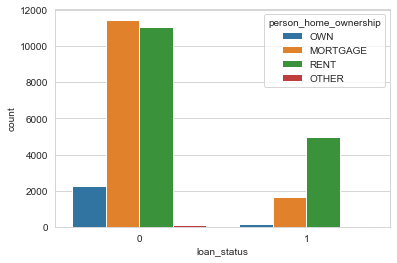

In [10]:
sns.countplot(x='loan_status',hue='person_home_ownership',data=df)
plt.savefig('loan_status_home.png')

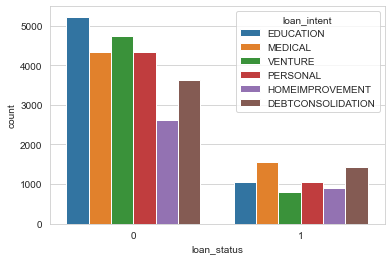

In [11]:
sns.countplot(x='loan_status',hue='loan_intent',data=df)
plt.savefig('loan_status_loanintent.png')

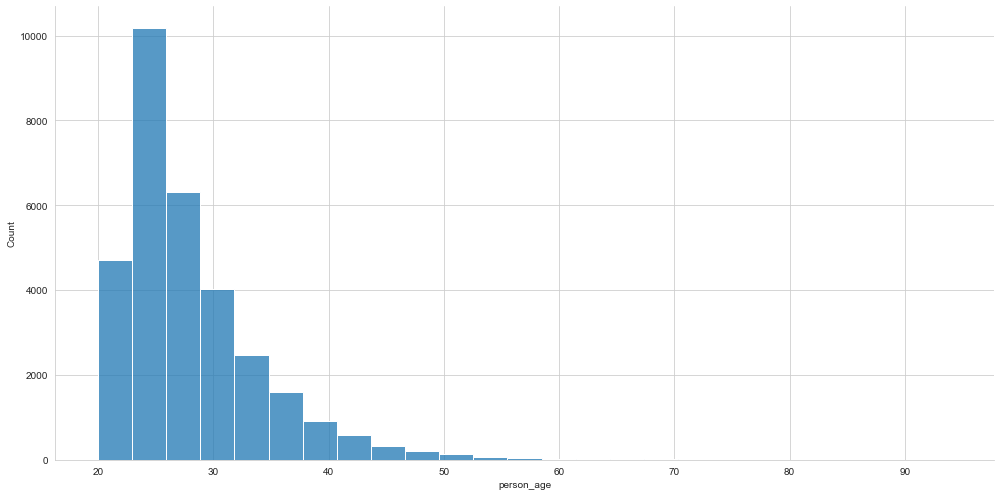

In [12]:
sns.displot(df['person_age'],kde=False,bins=25,height=7,aspect=2)
plt.savefig('agedist.png')

## Dealing with Null Values

<AxesSubplot:xlabel='loan_int_rate', ylabel='Count'>

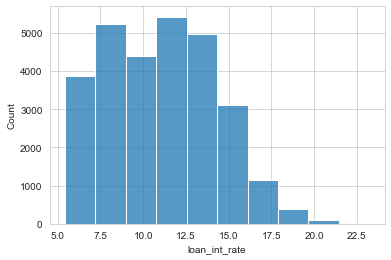

In [13]:
sns.histplot(data=df, x= 'loan_int_rate', bins = 10)

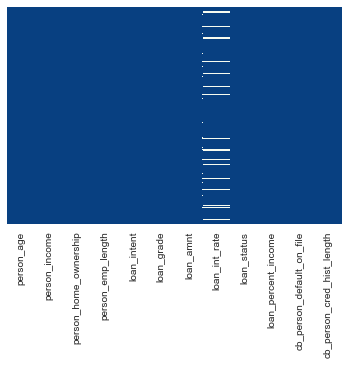

In [14]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap='GnBu_r')
plt.savefig('nulls1.png')
#LOTS of NAs in cabin but age has a reasonable amount missing so we can imputate the data

In [15]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3047
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [16]:
print("% Employment Length Missing")
print(round((895/32581)*100.00),'%')
print('\n')
print("% Loan Interest Rate Missing")
print(round((3116/32581)*100),'%')

% Employment Length Missing
3 %


% Loan Interest Rate Missing
10 %


In [17]:
df["person_emp_length"].fillna(4.790, inplace = True)
df["loan_int_rate"].fillna(11.012, inplace = True)

df.isnull().sum()
#Impute null values with mean of that column in the dataset

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## Creating Dummy Variables

In [18]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.000,EDUCATION,B,1000,11.140,0,0.100,N,2
2,25,9600,MORTGAGE,1.000,MEDICAL,C,5500,12.870,1,0.570,N,3
3,23,65500,RENT,4.000,MEDICAL,C,35000,15.230,1,0.530,N,2
4,24,54400,RENT,8.000,MEDICAL,C,35000,14.270,1,0.550,Y,4
5,21,9900,OWN,2.000,VENTURE,A,2500,7.140,1,0.250,N,2


In [19]:
home_ownership= pd.get_dummies(df['person_home_ownership'],drop_first=True)





new_loan_intent= pd.get_dummies(df['loan_intent'],drop_first=True)
default_onfile= pd.get_dummies(df['cb_person_default_on_file'],drop_first=True)
loangrade= pd.get_dummies(df['loan_grade'],drop_first=True)

In [20]:
home_ownership.head()

,OTHER,OWN,RENT
1,0,1,0
2,0,0,0
3,0,0,1
4,0,0,1
5,0,1,0


In [21]:
new_loan_intent.head()

,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
5,0,0,0,0,1


In [22]:
df = pd.concat([df,home_ownership,new_loan_intent,default_onfile,loangrade],axis=1)
df.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,MEDICAL,PERSONAL,VENTURE,Y,B,C,D,E,F,G
1,21,9600,OWN,5.000,EDUCATION,B,1000,11.140,0,0.100,...,0,0,0,0,1,0,0,0,0,0
2,25,9600,MORTGAGE,1.000,MEDICAL,C,5500,12.870,1,0.570,...,1,0,0,0,0,1,0,0,0,0


In [23]:
df.drop(['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file'],axis=1,inplace=True)
#drop old columns

In [24]:
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,...,MEDICAL,PERSONAL,VENTURE,Y,B,C,D,E,F,G
1,21,9600,5.000,1000,11.140,0,0.100,2,0,1,...,0,0,0,0,1,0,0,0,0,0
2,25,9600,1.000,5500,12.870,1,0.570,3,0,0,...,1,0,0,0,0,1,0,0,0,0
3,23,65500,4.000,35000,15.230,1,0.530,2,0,0,...,1,0,0,0,0,1,0,0,0,0
4,24,54400,8.000,35000,14.270,1,0.550,4,0,0,...,1,0,0,1,0,1,0,0,0,0
5,21,9900,2.000,2500,7.140,1,0.250,2,0,1,...,0,0,1,0,0,0,0,0,0,0


## Balancing the Target Variable for Train, Test Split

In [25]:
df['loan_status'].value_counts()

0    24854
1     6825
Name: loan_status, dtype: int64

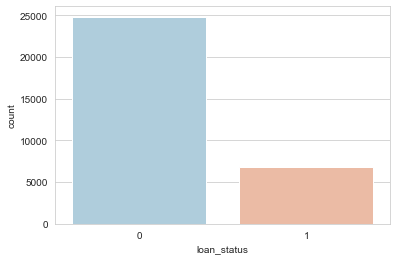

In [26]:
sns.countplot(x='loan_status',data=df,palette='RdBu_r')
plt.savefig('targetvariable.png')
#Unbalanced Dataset

In [27]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [28]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [30]:
print("Before oversampling:",Counter(y_train))

Before oversampling: Counter({0: 17390, 1: 4785})


In [31]:
SMOTE = SMOTE()

In [32]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [33]:
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({0: 17390, 1: 17390})


## Testing the Models

## Logistic Regression Model

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [35]:
logmodel_unbal = LogisticRegression(solver='liblinear')

logmodel_unbal.fit(X_train, y_train)

logpredictions_unbal = logmodel_unbal.predict(X_test)
              

print(classification_report(y_test,logpredictions_unbal))
confusion_matrix(y_test,logpredictions_unbal)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      7464
           1       0.73      0.17      0.27      2040

    accuracy                           0.81      9504
   macro avg       0.77      0.57      0.58      9504
weighted avg       0.79      0.81      0.76      9504



array([[7337,  127],
       [1702,  338]], dtype=int64)

In [36]:
logmodel_bal = LogisticRegression(solver='liblinear')

logmodel_bal.fit(X_train_SMOTE, y_train_SMOTE)

logpredictions_bal = logmodel_bal.predict(X_test)

print(classification_report(y_test,logpredictions_bal))
confusion_matrix(y_test,logpredictions_bal)

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      7464
           1       0.40      0.77      0.52      2040

    accuracy                           0.70      9504
   macro avg       0.66      0.72      0.65      9504
weighted avg       0.80      0.70      0.73      9504



array([[5082, 2382],
       [ 473, 1567]], dtype=int64)

## Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc_unbal = RandomForestClassifier(n_estimators=100)

rfc_unbal.fit(X_train, y_train)

rfc_pred_unbal = rfc_unbal.predict(X_test)

print(confusion_matrix(y_test,rfc_pred_unbal))
print(classification_report(y_test,rfc_pred_unbal))

[[7412   52]
 [ 562 1478]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7464
           1       0.97      0.72      0.83      2040

    accuracy                           0.94      9504
   macro avg       0.95      0.86      0.89      9504
weighted avg       0.94      0.94      0.93      9504



In [39]:
rfc_bal = RandomForestClassifier(n_estimators=100)

rfc_bal.fit(X_train_SMOTE, y_train_SMOTE)

rfc_pred_bal = rfc_bal.predict(X_test)

print(confusion_matrix(y_test,rfc_pred_bal))
print(classification_report(y_test,rfc_pred_bal))

[[7291  173]
 [ 545 1495]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7464
           1       0.90      0.73      0.81      2040

    accuracy                           0.92      9504
   macro avg       0.91      0.85      0.88      9504
weighted avg       0.92      0.92      0.92      9504



## XGBoost Model

In [40]:
from numpy import loadtxt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [41]:
xgb_model_unbal = xgb.XGBClassifier(use_label_encoder=False,n_estimators = 220, random_state= 2,eval_metric='mlogloss')
xgb_model_unbal.fit(X_train, y_train)
xgpredictions_unbal = xgb_model_unbal.predict(X_test)

print(confusion_matrix(y_test,xgpredictions_unbal))

print(classification_report(y_test,xgpredictions_unbal))

[[7357  107]
 [ 484 1556]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7464
           1       0.94      0.76      0.84      2040

    accuracy                           0.94      9504
   macro avg       0.94      0.87      0.90      9504
weighted avg       0.94      0.94      0.94      9504



In [45]:
xgb_model_bal = xgb.XGBClassifier(use_label_encoder=False, n_estimators = 220, random_state= 2,eval_metric='mlogloss')
xgb_model_bal.fit(X_train_SMOTE, y_train_SMOTE)
xgpredictions_bal = xgb_model_bal.predict(X_test)

print(confusion_matrix(y_test,xgpredictions_bal))

print(classification_report(y_test,xgpredictions_bal))

[[7339  125]
 [ 493 1547]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7464
           1       0.93      0.76      0.83      2040

    accuracy                           0.93      9504
   macro avg       0.93      0.87      0.90      9504
weighted avg       0.93      0.93      0.93      9504



## Conclusion